In [43]:
# conventional way to import pandas
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import Imputer
import pylab as pl
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# DF TO EXCEL
from pandas import ExcelWriter
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from pandas import ExcelWriter

In [44]:
# read CSV file from the 'data' subdirectory using a relative path
Dataset= pd.read_csv('C:\\Users\\Admin\\Desktop\\CS3123\\Data_Set\\Dataset.csv')

# display the first 5 rows
Dataset.head()

,0,0.1,1,2,3,4,5,6,7,8,...,436,437,438,439,440,441,442,443,444,445
0,1.204940e+12,1,79,1.0,4597,73.0,164.0,NaN,-1,-1,...,-1.0,-1.0,-1.0,20.0,NaN,1.0,40.0,-1.0,-1.0,-1.0
1,1.407940e+12,2,76,0.0,4595,74.0,172.0,NaN,1,-1,...,-1.0,-1.0,-1.0,20.0,NaN,1.0,55.0,-1.0,-1.0,-1.0
2,2.112950e+12,3,72,1.0,4602,NaN,NaN,NaN,1,1,...,-1.0,-1.0,-1.0,NaN,NaN,1.0,72.0,-1.0,-1.0,-1.0
3,4.129550e+11,4,63,1.0,4600,75.0,168.0,NaN,-1,-1,...,-1.0,-1.0,-1.0,20.0,NaN,1.0,55.0,-1.0,-1.0,-1.0
4,2.307940e+12,5,80,0.0,4679,85.0,187.0,NaN,-1,-1,...,-1.0,-1.0,-1.0,NaN,NaN,1.0,27.0,-1.0,-1.0,-1.0


In [45]:
# Drop index and unnessery featuer 
Dataset.drop(['0', '0.1','3','4'], axis=1,inplace=True)

In [46]:
#Drop all features except (Age - gender -Height -weight)
subset=Dataset.drop(Dataset.columns.to_series()["6":"445"], axis=1)

In [47]:
subset.shape

(2772, 3)

In [48]:
#Missing da


In [49]:
import numpy as np

# Drop sample that has missing value in Gender feater 
AH_Data=subset.drop(subset.index[1319])

AH_Data.shape

(2771, 3)

In [50]:
#removing outliers
AH_Data = AH_Data[(AH_Data['1']> 0)]
AH_Data= AH_Data[(AH_Data['1']<100)]



In [51]:
AH_Data.shape

(2759, 3)

In [52]:
#Removing outliers from Hight
AH_Data = AH_Data[(AH_Data['5']> 145)]
AH_Data = AH_Data[(AH_Data['5']<195)]

# Visualizing data using seaborn

**Seaborn:** Python library for statistical data visualization built on top of Matplotlib

In [53]:
AH_Data.shape

(2288, 3)

In [54]:
# conventional way to import seaborn
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline

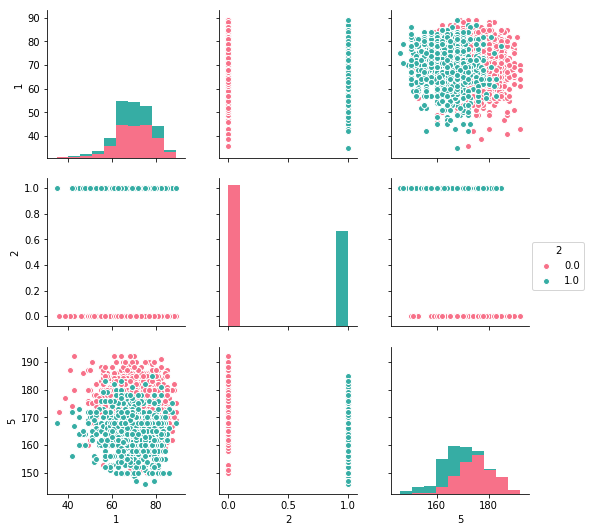

In [55]:
sns.pairplot(AH_Data,  hue="2",palette="husl")

In [56]:
# Female subset
F_Data=AH_Data[AH_Data['2'] == 0.0]
#Male subset
M_Data=AH_Data[AH_Data['2'] == 1.0]

In [57]:
BF_Data=F_Data.sample(943, random_state=0)

In [58]:
frames = [M_Data, BF_Data]

In [59]:
MF_Data = pd.concat(frames)

In [60]:
MF_Data= MF_Data[(MF_Data['1']> 0)]
MF_Data =MF_Data[(MF_Data['1']<100)]


In [61]:
MF_Data

,1,2,5
0,79,1.0,164.0
3,63,1.0,168.0
7,65,1.0,165.0
10,74,1.0,165.0
18,69,1.0,157.0
20,65,1.0,164.0
22,82,1.0,165.0
27,70,1.0,160.0
29,67,1.0,164.0
32,62,1.0,168.0


In [62]:
MF_Data=MF_Data.sample(1864, random_state=0)

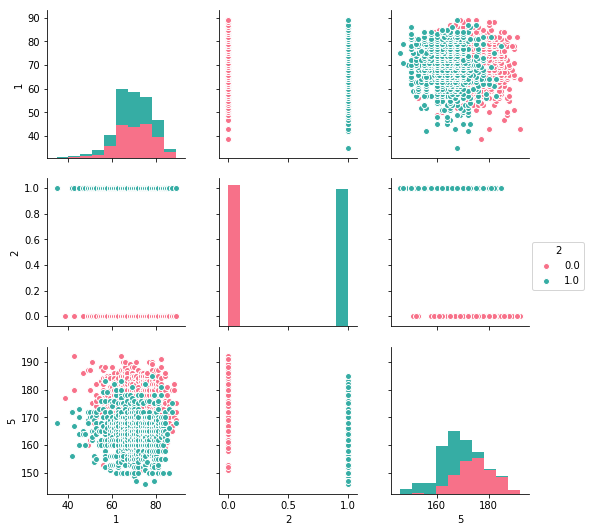

In [63]:
MF_Data=MF_Data.sort_values("1", ascending = 'True')
MF_Data
sns.pairplot(MF_Data,  hue="2",palette="husl")


# Task 7: Cross Validation CV

In [64]:
# select a Series from the DataFrame
y = MF_Data['2']
TT=MF_Data.drop(['2'],axis=1)
X=TT[:]
# print the first 5 values
y.shape


(1864,)

In [65]:
MF_Data


,1,2,5
1689,35,1.0,168.0
2529,39,0.0,177.0
579,42,1.0,172.0
2728,42,1.0,156.0
404,42,1.0,172.0
2377,43,1.0,167.0
304,43,0.0,180.0
703,43,0.0,192.0
1358,45,1.0,160.0
1116,45,1.0,164.0


In [66]:
# check the type and shape of y
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(1864,)


# KNN ML Algorithm With Accuracy 79%

In [67]:
from sklearn.model_selection import cross_val_score
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
#(scores)

In [68]:
# use average accuracy as an estimate of out-of-sample accuracy
print('Accuracy of K-NN classifier on test set:',scores.mean())


Accuracy of K-NN classifier on test set: 0.6801117782859072


In [69]:
# search for an optimal value of K for KNN
k_range = list(range(1, 50))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)


[0.6028530286514058, 0.6038596632887885, 0.6425260926108761, 0.6591039691598858, 0.6801117782859072, 0.6660789023914302, 0.690850121792025, 0.6838036181590625, 0.700493224056953, 0.6983140276763354, 0.7101563293315081, 0.7020918437881174, 0.7128301872942351, 0.7079828524658757, 0.7155040146713205, 0.7112058144528166, 0.7273463163264932, 0.7230423660073626, 0.726802870645981, 0.7182122814808833, 0.7300287382688773, 0.7300344577838623, 0.7343441276179781, 0.7300344577838623, 0.7370293940250338, 0.7397147521890144, 0.7381046934278797, 0.7418767288533932, 0.7461778041222105, 0.7461835236371955, 0.7467182829954845, 0.7440301109524736, 0.7504817238556994, 0.745628638926713, 0.7472300725369077, 0.7461691483856288, 0.7504644735538191, 0.7488573204286394, 0.7526150111882277, 0.7526121055522728, 0.7579856357592641, 0.7579684160430255, 0.7585146144312844, 0.7574421900787518, 0.7612056309389669, 0.7579970442035926, 0.7622981194724099, 0.7649662273345104, 0.7644314679762216]


Text(0,0.5,'Cross-Validated Accuracy')

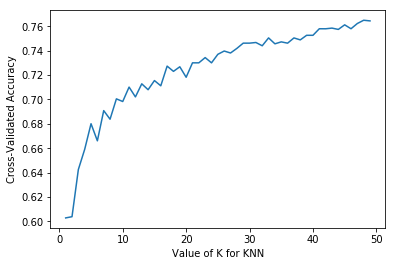

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [71]:
# 10-fold cross-validation with the best KNN model
knn = KNeighborsClassifier(n_neighbors=24)
y_pred_K = cross_val_predict(knn, X, y, cv=10)
conf_mat_KNN = confusion_matrix(y, y_pred_K)
print('Accuracy of KNN classifier on test set:',cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())


Accuracy of KNN classifier on test set: 0.7300344577838623


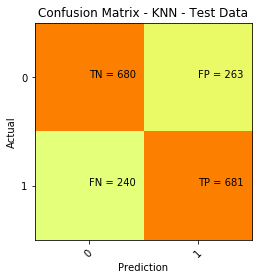

In [72]:
plt.clf()
plt.imshow(conf_mat_KNN, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['0','1']
plt.title('Confusion Matrix - KNN - Test Data')
plt.ylabel('Actual')
plt.xlabel('Prediction')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(conf_mat_KNN[i][j]))
plt.show()

In [73]:
print(classification_report(y, y_pred_K))

             precision    recall  f1-score   support

        0.0       0.74      0.72      0.73       943
        1.0       0.72      0.74      0.73       921

avg / total       0.73      0.73      0.73      1864



#  Decision Tree with Accuracy 67%

In [74]:
#10-fold cross-validation with Decision Tree
DT = DecisionTreeClassifier()
scores = cross_val_score(DT, X, y, cv=10, scoring='accuracy')
y_pred_DT = cross_val_predict(DT, X, y, cv=10)
conf_mat_DT = confusion_matrix(y, y_pred_DT)
#print(scores)

In [75]:
# use average accuracy as an estimate of out-of-sample accuracy
print('Accuracy of Decision Tree classifier on test set:',scores.mean())

Accuracy of Decision Tree classifier on test set: 0.5835095678004152


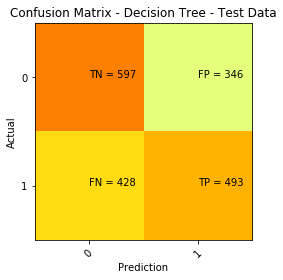

In [76]:
plt.clf()
plt.imshow(conf_mat_DT, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['0','1']
plt.title('Confusion Matrix - Decision Tree - Test Data')
plt.ylabel('Actual')
plt.xlabel('Prediction')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(conf_mat_DT[i][j]))
plt.show()

In [77]:
print(classification_report(y, y_pred_DT))

             precision    recall  f1-score   support

        0.0       0.58      0.63      0.61       943
        1.0       0.59      0.54      0.56       921

avg / total       0.58      0.58      0.58      1864



#  Logistic Regrassion with Accuracy 73%

In [78]:
# 10-fold cross-validation with logistic regression
logreg = LogisticRegression()
scores = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
y_pred_LR= cross_val_predict(logreg, X, y, cv=10)
conf_mat_LR= confusion_matrix(y, y_pred_LR)
#print(scores)


In [79]:
# use average accuracy as an estimate of out-of-sample accuracy
print('Accuracy of logistic regression classifier on test set:',scores.mean())

Accuracy of logistic regression classifier on test set: 0.778555825524819


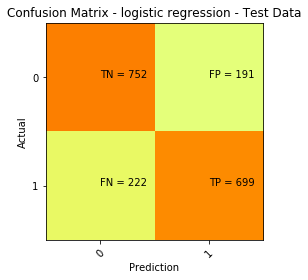

In [80]:
plt.clf()
plt.imshow(conf_mat_LR, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['0','1']
plt.title('Confusion Matrix - logistic regression - Test Data')
plt.ylabel('Actual')
plt.xlabel('Prediction')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(conf_mat_LR[i][j]))
plt.show()

In [81]:
print(classification_report(y, y_pred_LR))

             precision    recall  f1-score   support

        0.0       0.77      0.80      0.78       943
        1.0       0.79      0.76      0.77       921

avg / total       0.78      0.78      0.78      1864



#  Linear Discriminant Analysis with Accuracy 74%

In [82]:
#10-fold cross-validation with Discriminant Analysis
lda = LinearDiscriminantAnalysis()
scores = cross_val_score(lda, X, y, cv=10, scoring='accuracy')
y_pred_LDA= cross_val_predict(lda, X, y, cv=10)
conf_mat_LDA= confusion_matrix(y, y_pred_LDA)
#print(scores)

In [83]:
# use average accuracy as an estimate of out-of-sample accuracy
print('Accuracy of LDA classifier on test set:',scores.mean())

Accuracy of LDA classifier on test set: 0.7993547653041375


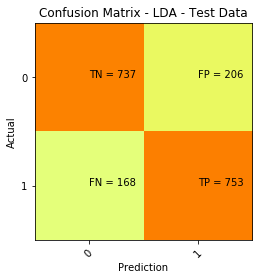

In [84]:
plt.clf()
plt.imshow(conf_mat_LDA, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['0','1']
plt.title('Confusion Matrix - LDA - Test Data')
plt.ylabel('Actual')
plt.xlabel('Prediction')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(conf_mat_LDA[i][j]))
plt.show()

In [85]:
print(classification_report(y, y_pred_LDA))

             precision    recall  f1-score   support

        0.0       0.81      0.78      0.80       943
        1.0       0.79      0.82      0.80       921

avg / total       0.80      0.80      0.80      1864



In [86]:
from sklearn.svm import SVC  
SVM= SVC(kernel='linear') 
scores = cross_val_score(SVM, X, y, cv=10, scoring='accuracy')
y_pred_SVM= cross_val_predict(SVM, X, y, cv=10)
conf_mat_SVM= confusion_matrix(y, y_pred_SVM)
#print(scores)
print('Accuracy of LDA classifier on test set:',scores.mean())

Accuracy of LDA classifier on test set: 0.8004357842219685


In [87]:
from sklearn.neural_network import MLPClassifier
NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
scores = cross_val_score(NN, X, y, cv=10, scoring='accuracy')
y_pred_NN= cross_val_predict(NN, X, y, cv=10)
conf_mat_SVM= confusion_matrix(y, y_pred_NN)
#print(scores)
print('Accuracy of NN classifier on test set:',scores.mean())

Accuracy of NN classifier on test set: 0.5058996338286985


In [88]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
y_pred_clf= cross_val_predict(clf, X, y, cv=10)
conf_mat_clf= confusion_matrix(y, y_pred_clf)
#print(scores)
print('Accuracy of NN classifier on test set:',scores.mean())

Accuracy of NN classifier on test set: 0.7673712375072947
